# Project 3: Web APIs & Classification

## Background

InfluencerX is a media organization that represents entertainment influencers. The influencers under the company label , as well as the organization's employees, contribute actively to various entertainment-related subreddits on popular social media site Reddit. These include subreddits for Netflix and Amazon Prime Video, two of the biggest over-the-top media streaming services. To streamline content posting, InfluencerX is looking for a model that can help the influencers and employees label their posts as belonging to either the Netflix subreddit or the Prime Video subreddit.

## Problem Statement
To help InfluencerX create a classification model that can accurately label which subreddit a given post belongs to, in order to streamline the content-posting process.

## Content
- [Reading in Datasets](#Reading-in-Datasets)
- [Data Cleaning](#Data-Cleaning)
- [Exploratory Data Analysis (EDA)](#Exploratory-Data-Analysis-(EDA))
- [Preprocessing Data and Model Prep](#Preprocessing-Data-and-Model-Prep)
- [Baseline Accuracy](#Baseline-Accuracy)
- [Model 1: Naive Bayes](#Model-1:-Naive-Bayes)
- [Model 2: Logistic Regression](#Model-2:-Logistic-Regression)
- [Conclusion](#Conclusion)

## Importing Libraries

In [1]:
#Importing basic libraries 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

## Reading in Datasets

<i> To train our model we will need to leverage current posts from the Netflix and Amazon Prime Video subreddits. These posts have been collected separately.

In [2]:
#Reading in dataset with Netflix posts
netflix = pd.read_csv('../datasets/netflix.csv')
netflix.shape

(625, 108)

In [3]:
#Reading in dataset with Prime Video posts
prime = pd.read_csv('../datasets/prime_video.csv')
prime.shape

(613, 114)

## Data Cleaning

In [4]:
#Taking a look at the Netflix dataset
netflix.head()

,approved_at_utc,subreddit,selftext,author_fullname,saved,mod_reason_title,gilded,clicked,title,link_flair_richtext,...,created_utc,num_crossposts,media,is_video,url_overridden_by_dest,author_cakeday,link_flair_template_id,is_gallery,media_metadata,gallery_data
0,NaN,netflix,I just signed into my PS4 and tried to watch N...,t2_une6d,False,NaN,0,False,PS4 asking for verification?,[],...,1.607181e+09,0,NaN,False,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,netflix,Does anyone know a full list of shows being re...,t2_2wuwd4l5,False,NaN,0,False,Weekly released netflix shows list?,[],...,1.607176e+09,0,NaN,False,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,netflix,I use the netflix app on my fire tv stick and ...,t2_zfetx,False,NaN,0,False,[help] Netflix playing the second episode inst...,[],...,1.607174e+09,0,NaN,False,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,netflix,"Seriously, in the top 10 movies watched over t...",t2_3tenylcy,False,NaN,0,False,Who the F removes the latest grinch movie DURI...,[],...,1.607172e+09,0,NaN,False,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,netflix,There was a show/movie advertised on Netflix C...,t2_30ddbn68,False,NaN,0,False,Can't remember Netflix movie/show title,[],...,1.607171e+09,0,NaN,False,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
#Taking a look at the Prime Video dataset
prime.head()

,approved_at_utc,subreddit,selftext,author_fullname,saved,mod_reason_title,gilded,clicked,title,link_flair_richtext,...,is_video,url_overridden_by_dest,post_hint,preview,is_gallery,media_metadata,gallery_data,author_cakeday,crosspost_parent_list,crosspost_parent
0,NaN,AmazonPrimeVideo,I got a credit card to validate Prime video fr...,t2_pxreetq,False,NaN,0,False,Activate Prime video without credit card?,[],...,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,AmazonPrimeVideo,Either via the website (using Edge) or via the...,t2_2imr1sh0,False,NaN,0,False,Does Prime Video support 4K on Windows?,[],...,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,AmazonPrimeVideo,NaN,t2_8i959yyy,False,NaN,0,False,Hitler's Money,[],...,False,https://watch.amazon.com/detail?gti=amzn1.dv.g...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,AmazonPrimeVideo,NaN,t2_8i959yyy,False,NaN,0,False,People You May Know. 2020 disinformation speci...,[],...,False,https://watch.amazon.com/detail?gti=amzn1.dv.g...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,AmazonPrimeVideo,NaN,t2_4yn9se4g,False,NaN,0,False,"If You Haven't Seen Infra-Man, You Haven't Liv...",[],...,False,https://youtu.be/qwIjlN2Uugw,rich:video,{'images': [{'source': {'url': 'https://extern...,NaN,NaN,NaN,NaN,NaN,NaN


<i> For the purpose of this project, we will mostly be leveraging the text columns (title, selftext). As such, we will extract these columns and focus our data cleaning efforts on them.

In [6]:
#Extracting relevant columns from the datasets
netflix = netflix[['subreddit','title','selftext']]
prime = prime[['subreddit','title','selftext']]

### Filling in Missing Values

<i> We see above that some posts do not have any text within (selftext column). As such, we start by filling in the NaN values.

In [7]:
netflix.fillna("", inplace=True)
prime.fillna("", inplace=True)

### Combining Columns

<i> We then combine the text fields for easier analysis.

In [8]:
netflix['combined'] = netflix['title'] +" "+ netflix['selftext']
prime['combined'] = prime['title'] +" "+ prime['selftext']

### Dropping Duplicates

<i> As there may be some instances of duplicate posts, we drop duplicates.

In [9]:
netflix.drop_duplicates(subset='combined', inplace=True)
netflix.shape

(625, 4)

In [10]:
prime.drop_duplicates(subset='combined', inplace=True)
prime.shape

(487, 4)

<i> After dropping duplicates, we are left with 625 posts in the Netflix dataset and 487 posts in the Prime Video dataset. 

### Text Cleaning

<i> After the initial cleaning of the datasets, we now need to clean the combined text to aid in further analysis. We start with defining a function to remove html, non-letters, convert all text to lowercase, lemmatize text and split it into individual words, and remove common english stop words. 

In [11]:
#Importing relevant libraries
import nltk
from nltk.stem import WordNetLemmatizer #Importing lemmatizer
from nltk.corpus import wordnet #Importing wordnet
from nltk.corpus import stopwords #Importing list of stopwords
import regex as re #Importing regex 
from bs4 import BeautifulSoup #Importing beautifulsoup

In [12]:
#Defining function to lemmatize, remove non-letters, convert all text to lowercase and remove stop words
def cleaning_text(combined_text):    
    
    # 1. Remove HTML.
    text_nohtml = BeautifulSoup(combined_text).get_text()
    
    # 2. Remove non-letters.
    letters_only = re.sub("[^a-zA-Z]", " ", text_nohtml)
    
    # 3. Convert to lower case
    text = letters_only.lower()
    
    # 4. Lemmatizing and splitting into individual words
    #To improve lemmatization and make it context dependent, 
    #we define function to find out the POS (Part of Sentence) tag and pass it on to the lemmatizer
    
    lemmatizer = WordNetLemmatizer() # Instantiate lemmatizer
    
    # Defining function to convert nltk tag to wordnet tag
    def nltk_tag_to_wordnet_tag(nltk_tag):
        if nltk_tag.startswith('J'):
            return wordnet.ADJ
        elif nltk_tag.startswith('V'):
            return wordnet.VERB
        elif nltk_tag.startswith('N'):
            return wordnet.NOUN
        elif nltk_tag.startswith('R'):
            return wordnet.ADV
        else:          
            return None

    #Defining function to lemmatize text according to POS tag and split into individual words
    def lemmatize_text(text_to_lemmatize): 
        nltk_tagged=nltk.pos_tag(nltk.word_tokenize(text_to_lemmatize)) #tokenize the text and find the POS tag for each token
        wordnet_tagged=map(lambda x: (x[0], nltk_tag_to_wordnet_tag(x[1])), nltk_tagged) #tuple of(token, wordnet_tag)
        lemmatized_text = []
        for word, tag in wordnet_tagged:
            if tag is None:
                lemmatized_text.append(word) #if there is no available tag, append the token as is
            else:        
                lemmatized_text.append(lemmatizer.lemmatize(word, tag)) #else use the tag to lemmatize the token
        return lemmatized_text
    
    lemmatized_words = lemmatize_text(text)
    
    # 5. As searching a set is much faster than searching a list, we convert the stopwords to a set
    stops = set(stopwords.words('english'))
    
    # 6. Remove stopwords.
    meaningful_words = [w for w in lemmatized_words if not w in stops]
    
    # 7. Join the words back into one string separated by space and return the result
    return(" ".join(meaningful_words))

<i> <b>Note: </b> By default, the lemmatizer will lemmatize all words by treating them as nouns. As the lemmatizer does take into account POS (Part of Sentence) tagging, we need to find out the POS tag and pass it on to the lemmatizer, to make the lemmatizer work better and make it context dependent. We use the two functions above (lemmatize_text and nltk_tag_to_wordnet_tag) for this purpose. 

In [13]:
#Applying function to Netflix posts
netflix['combined'] = netflix['combined'].apply(cleaning_text)
netflix['combined'].head()

0    p ask verification sign p try watch netflix as...
1    weekly release netflix show list anyone know f...
2    help netflix play second episode instead first...
3    f remove late grinch movie christmas season se...
4    remember netflix movie show title show movie a...
Name: combined, dtype: object

In [14]:
#Applying function to Prime Video posts
prime['combined'] = prime['combined'].apply(cleaning_text)
prime['combined'].head()

0    activate prime video without credit card get c...
1    prime video support k window either via websit...
2                                         hitler money
3    people may know disinformation specialist disc...
4           see infra man live insane movie find prime
Name: combined, dtype: object

<i> Now that the data has been cleaned, we can undertake exploratory data analysis to find out more about the two datasets.

## Exploratory Data Analysis (EDA)

<i> One of the key aspects of interest in this case is term frequency. We will create a word cloud of the most commonly used words across the two datasets using NLTK's FreqDist library.

In [15]:
#Importing libraries
from nltk.probability import FreqDist
from wordcloud import WordCloud, ImageColorGenerator

In [16]:
#Creating a list of all words in the Netflix posts
netflix_posts = netflix['combined']
allwords_netflix = []
for post in netflix_posts:
    words = post.split()
    for word in words:
        allwords_netflix.append(word)
print(allwords_netflix)

['p', 'ask', 'verification', 'sign', 'p', 'try', 'watch', 'netflix', 'ask', 'send', 'verify', 'email', 'sure', 'happen', 'get', 'prompt', 'tv', 'netflix', 'app', 'weekly', 'release', 'netflix', 'show', 'list', 'anyone', 'know', 'full', 'list', 'show', 'release', 'weekly', 'instead', 'whole', 'season', 'try', 'search', 'netflix', 'seem', 'tag', 'help', 'netflix', 'play', 'second', 'episode', 'instead', 'first', 'one', 'use', 'netflix', 'app', 'fire', 'tv', 'stick', 'lot', 'show', 'try', 'play', 'click', 'say', 'play', 'episode', 'already', 'watch', 'first', 'one', 'even', 'show', 'continue', 'watching', 'bug', 'f', 'remove', 'late', 'grinch', 'movie', 'christmas', 'season', 'seriously', 'top', 'movie', 'watch', 'last', 'week', 'netflix', 'remove', 'late', 'grinch', 'movie', 'lineup', 'kid', 'piss', 'piss', 'edit', 'find', 'air', 'fx', 'tomorrow', 'night', 'pm', 'still', 'cable', 'remember', 'netflix', 'movie', 'show', 'title', 'show', 'movie', 'advertise', 'netflix', 'canada', 'week', '

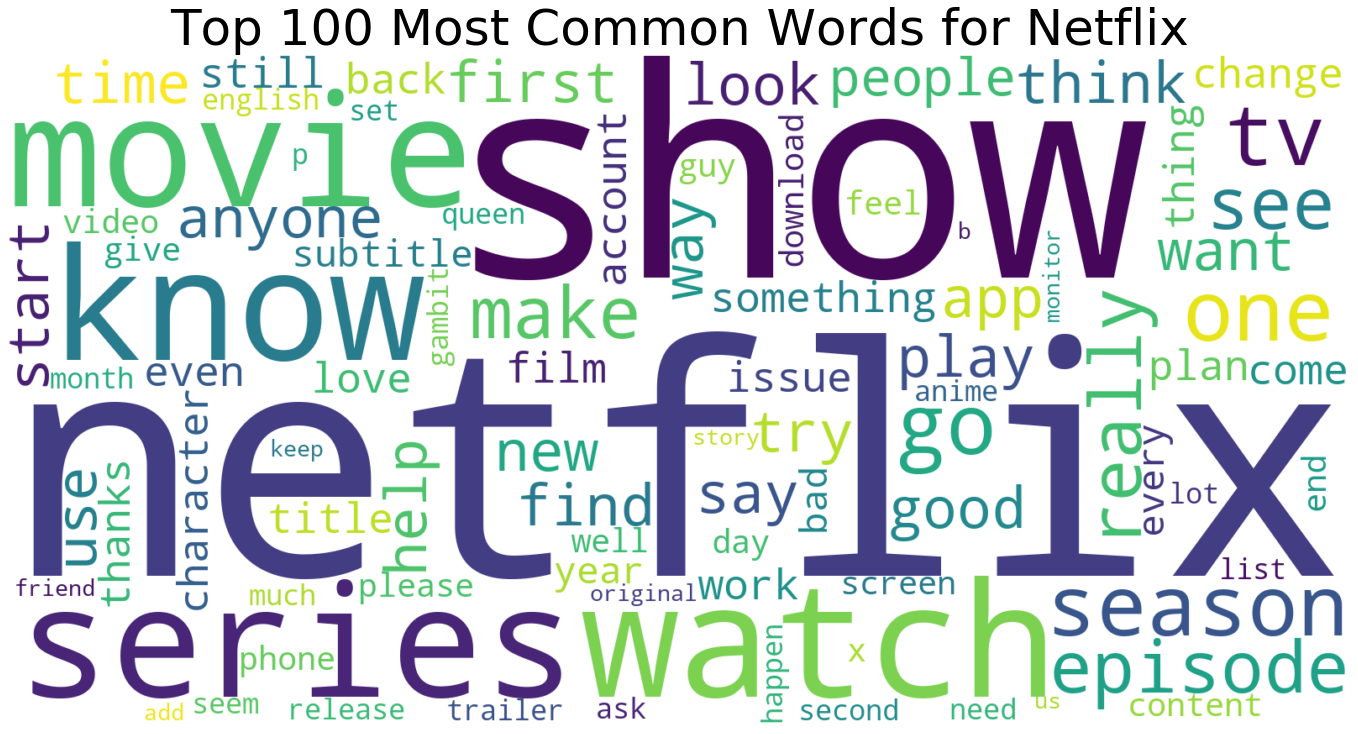

In [17]:
#Generating wordcloud of the 100 most common words within the Netflix posts
mostcommon_netflix = FreqDist(allwords_netflix).most_common(100) #Extracting 100 most common words
wordcloud = WordCloud(width=1600, height=800, background_color='white').generate(str(mostcommon_netflix).replace("'",''))
fig = plt.figure(figsize=(30,10), facecolor='white')
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.title('Top 100 Most Common Words for Netflix', fontsize=50)
plt.tight_layout(pad=0)
plt.show();

<i> We can also take a closer look at the frequency of the most commonly occuring words using a bar chart.

In [18]:
#Creating lists of the top 20 most commonly occuring words in the Netflix posts and their frequency
mostcommon_netflix_20 = FreqDist(allwords_netflix).most_common(20) #Extracting 20 most common words
words_netflix = []
frequency_netflix = []
for item in mostcommon_netflix_20:
    words_netflix.append(item[0])
    frequency_netflix.append(item[1])

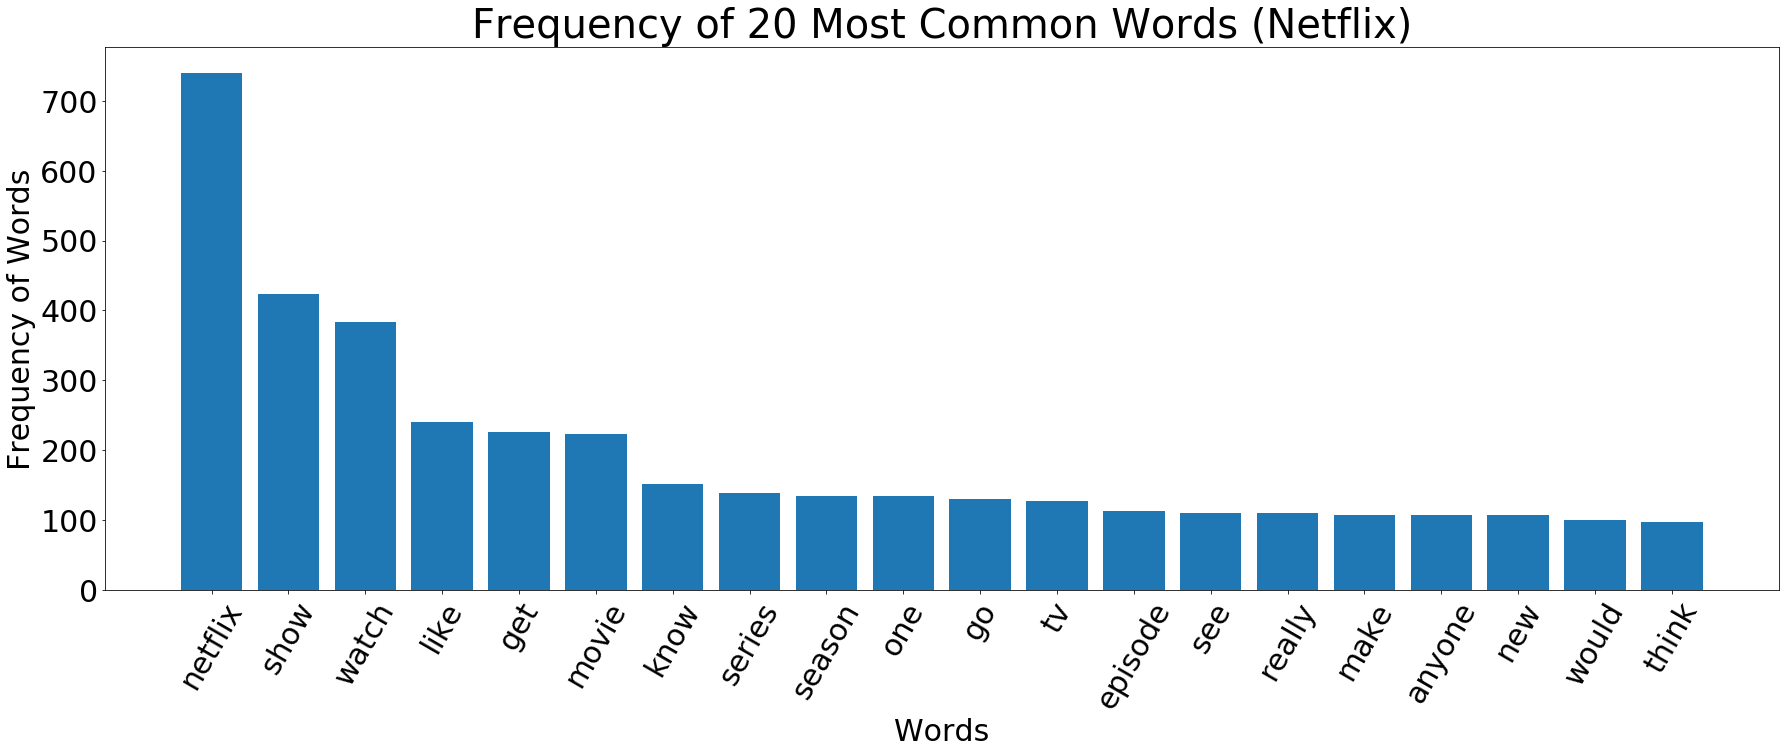

In [19]:
#Plotting bar chart 
plt.figure(figsize=(30,10))
plt.bar(words_netflix, frequency_netflix)
plt.xlabel('Words', fontsize=30)
plt.ylabel('Frequency of Words', fontsize=30)
plt.yticks(fontsize=30)
plt.xticks(rotation=60, fontsize=30)
plt.title('Frequency of 20 Most Common Words (Netflix)', fontsize=40)
plt.show();

<i> Not surprisingly, Netflix is the most commonly occuring word, along with other generic words like watch, movie, series, season, tv, episode etc. We see some words related to specific shows like queen, gambit in the top 100 as well (based on one of Netflix's latest popular shows, The Queen's Gambit).

In [20]:
#Creating a list of all words in the Prime Video posts
prime_posts = prime['combined']
allwords_prime = []
for post in prime_posts:
    words = post.split()
    for word in words:
        allwords_prime.append(word)
print(allwords_prime)

['activate', 'prime', 'video', 'without', 'credit', 'card', 'get', 'credit', 'card', 'validate', 'prime', 'video', 'free', 'trial', 'come', 'prime', 'game', 'get', 'battlefield', 'realize', 'expired', 'lol', 'way', 'redeem', 'something', 'like', 'bank', 'account', 'search', 'google', 'say', 'anything', 'prime', 'video', 'support', 'k', 'window', 'either', 'via', 'website', 'use', 'edge', 'via', 'window', 'store', 'app', 'anyone', 'know', 'hitler', 'money', 'people', 'may', 'know', 'disinformation', 'specialist', 'discovers', 'cambridge', 'analytica', 'collude', 'see', 'infra', 'man', 'live', 'insane', 'movie', 'find', 'prime', 'dan', 'v', 'free', 'prime', 'video', 'first', 'time', 'good', 'time', 'binge', 'watch', 'different', 'selection', 'amazon', 'prime', 'phone', 'pc', 'start', 'watchng', 'mean', 'girl', 'phone', 'prime', 'video', 'app', 'however', 'get', 'home', 'go', 'amazon', 'prime', 'continue', 'watch', 'however', 'movie', 'available', 'prime', 'pc', 'perfectly', 'capable', 'w

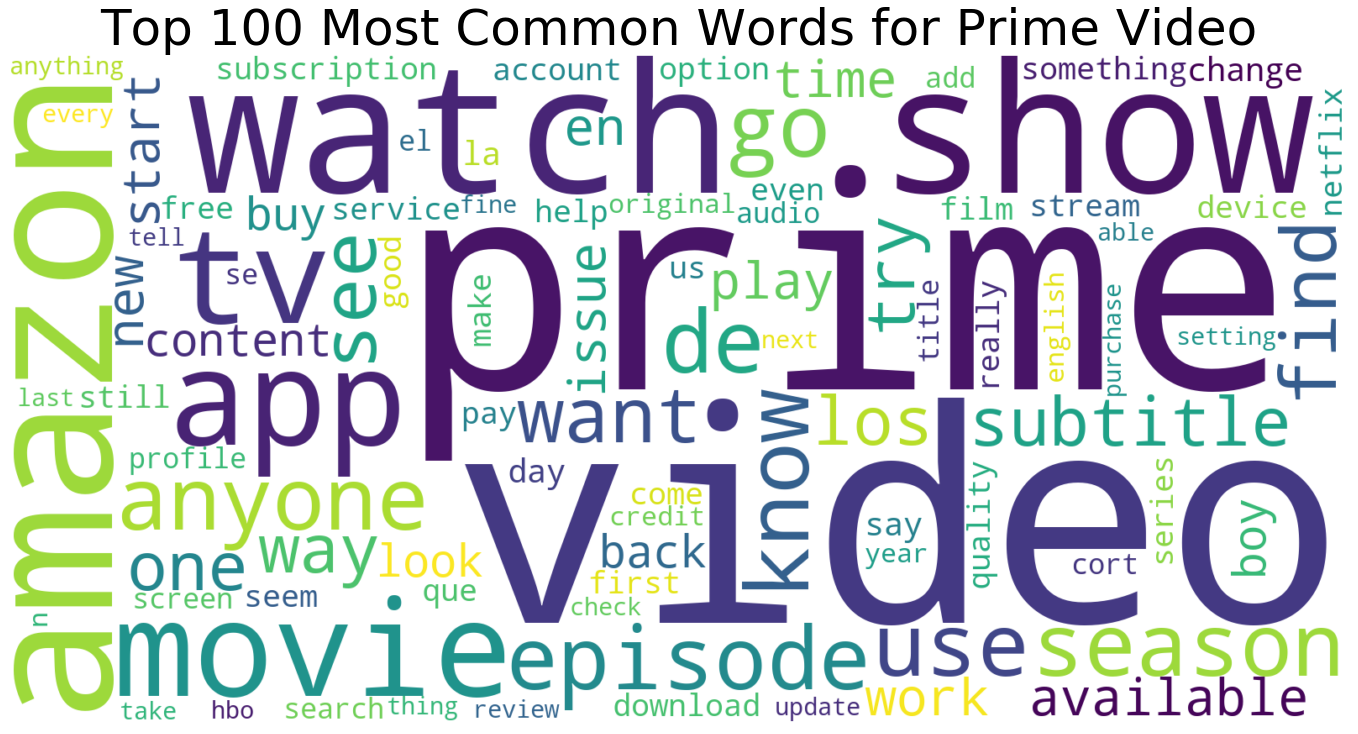

In [21]:
#Generating wordcloud of the 100 most common words within the Prime Video posts
mostcommon_prime = FreqDist(allwords_prime).most_common(100) #Extracting 100 most common words
wordcloud = WordCloud(width=1600, height=800, background_color='white').generate(str(mostcommon_prime).replace("'",''))
fig = plt.figure(figsize=(30,10), facecolor='white')
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.title('Top 100 Most Common Words for Prime Video', fontsize=50)
plt.tight_layout(pad=0)
plt.show();

In [22]:
#Creating lists of the top 20 most commonly occuring words in the Prime Video posts and their frequency
mostcommon_prime_20 = FreqDist(allwords_prime).most_common(20) #Extracting 20 most common words
words_prime = []
frequency_prime = []
for item in mostcommon_prime_20:
    words_prime.append(item[0])
    frequency_prime.append(item[1])

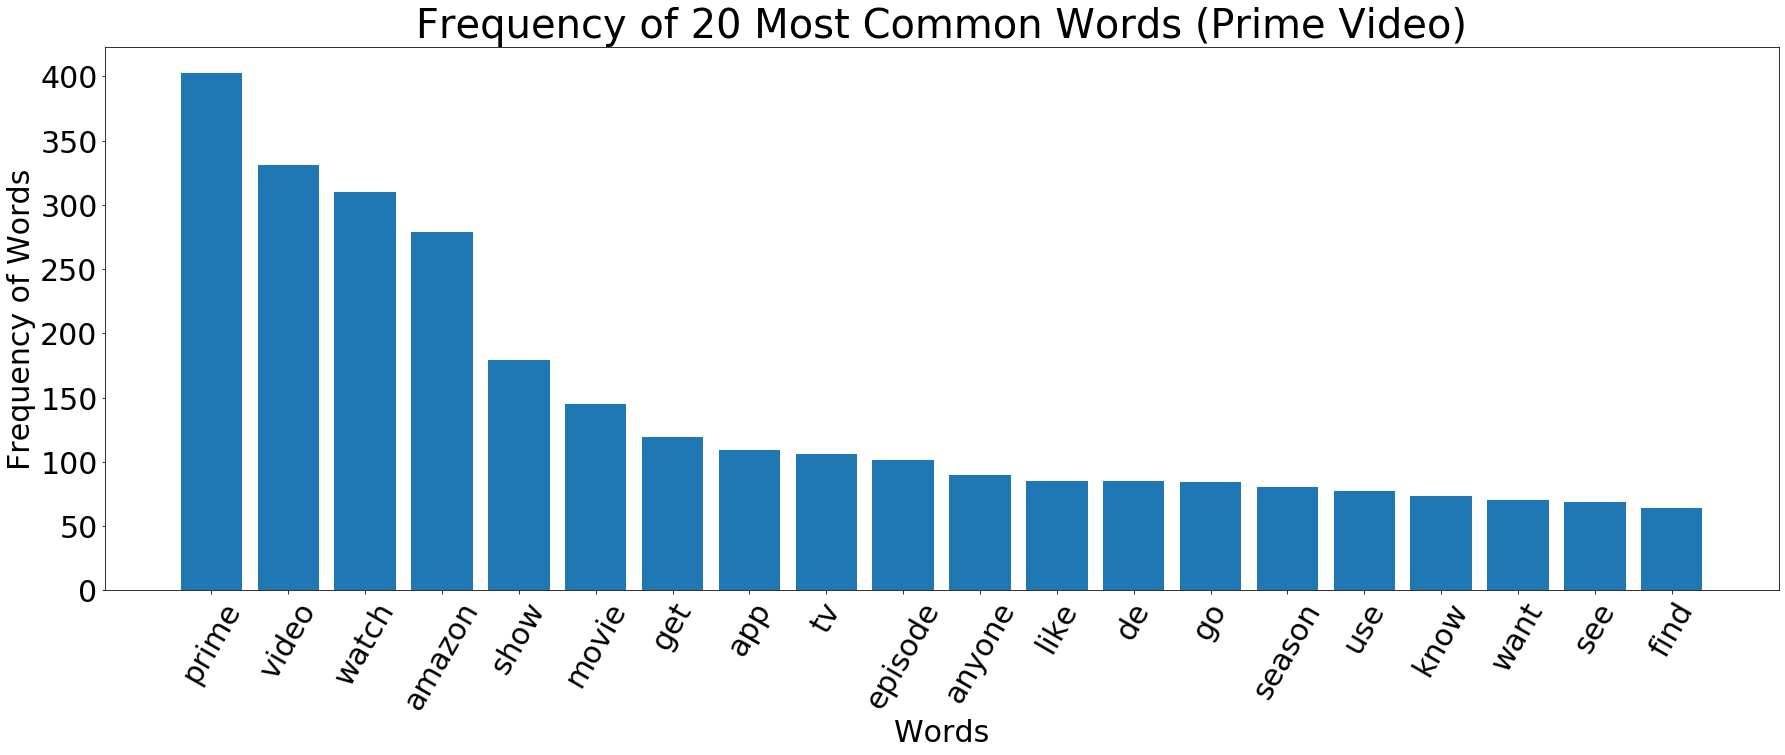

In [23]:
#Plotting bar chart 
plt.figure(figsize=(30,10))
plt.bar(words_prime, frequency_prime)
plt.xlabel('Words', fontsize=30)
plt.ylabel('Frequency of Words', fontsize=30)
plt.yticks(fontsize=30)
plt.xticks(rotation=60, fontsize=30)
plt.title('Frequency of 20 Most Common Words (Prime Video)', fontsize=40)
plt.show();

<i> Similarly, Prime, Video and Amazon are among the most commonly occuring words for the Prime Video posts. 
Words like watch, movie, tv, episode and season also appear in the top 20. Interestingly, while the terms Amazon or Prime do not seem to occur frequently in the Netflix posts, Netflix is amongst the top 100 most common words within the Prime Video posts.

<i> Armed with the insights from the EDA, we can process our data for modeling.

## Preprocessing Data and Model Prep

<i>Before making our data model-ready, we need to combine the two set of posts into a single dataframe.

In [24]:
#Appending Prime Video dataset to the Netflix dataset
data = netflix.append(prime).reset_index(drop=True)
data 

,subreddit,title,selftext,combined
0,netflix,PS4 asking for verification?,I just signed into my PS4 and tried to watch N...,p ask verification sign p try watch netflix as...
1,netflix,Weekly released netflix shows list?,Does anyone know a full list of shows being re...,weekly release netflix show list anyone know f...
2,netflix,[help] Netflix playing the second episode inst...,I use the netflix app on my fire tv stick and ...,help netflix play second episode instead first...
3,netflix,Who the F removes the latest grinch movie DURI...,"Seriously, in the top 10 movies watched over t...",f remove late grinch movie christmas season se...
4,netflix,Can't remember Netflix movie/show title,There was a show/movie advertised on Netflix C...,remember netflix movie show title show movie a...
...,...,...,...,...
1107,AmazonPrimeVideo,King Lear,I can’t seem to find the show King Lear. It’s ...,king lear seem find show king lear advertise p...
1108,AmazonPrimeVideo,Hanna Season 1 Review - Amazon Prime Video Epi...,,hanna season review amazon prime video episode
1109,AmazonPrimeVideo,What are the CRISPR Test videos?,Anyone have an idea what the CRISPR videos und...,crispr test video anyone idea crispr video tv ...
1110,AmazonPrimeVideo,Currently in Season 2 of The Americans,Does it get better? I am fascinated with the c...,currently season american get well fascinate c...


<i> We now need to create binary labels for the target variable (the subreddit).

In [25]:
data['subreddit'] = data['subreddit'].map({'AmazonPrimeVideo': 0, 'netflix': 1})

<i> Aslo, as we have combined the text already, we only need the combined and subreddit columns going forward.

In [26]:
data = data[['combined', 'subreddit']]

<i> With the updated dataframe, we can create the X and y variables.

In [27]:
X = data['combined']
y = data['subreddit']

In [28]:
#Examining the proportion of Netflix and Prime Video posts 
y.value_counts(normalize=True)

1    0.56205
0    0.43795
Name: subreddit, dtype: float64

### Metrics

<i> In this instance, as false positives and false negatives are equally bad (predicting a Prime Video post as a Netflix post is no worse than predicting a Netflix post as a Prime Video post), we will use accuracy to score our models.

Accuracy = (True Positive + True Negative) / (True Positive + True Negative + False Positive + False Negative)

### Train/Test Split

<i> Before proceeding, we'll split our data into a train and test set

In [29]:
#Importing library
from sklearn.model_selection import train_test_split

In [30]:
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y,
                                                    stratify=y,
                                                    random_state=42)

In [31]:
X_train.shape

(834,)

In [32]:
X_test.shape

(278,)

In [33]:
y_train.shape

(834,)

In [34]:
y_test.shape

(278,)

### Defining Baseline Accuracy

<i> We will need the baseline accuracy to evaluate the performance of our models. In this case, baseline accuracy will be the proportion of the two classes within the target variable.

In [35]:
y_test.value_counts(normalize=True)

1    0.561151
0    0.438849
Name: subreddit, dtype: float64

<i> Based on the above, if we predict every post to be a Netflix post we will have a 56.1% accuracy. This will be the baseline accuracy against which we will benchmark our models.

<i> For the purpose of this project, we will be creating and comparing three models, Naive Bayes, Logistic Regression and K Nearest Neighbors.

In [36]:
#Importing models
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

<i> In order to feed the text from the posts column into a model, we need to to turn it into a structured, numeric dataframe. To do this, we can use CountVectorizer or Term Frequency-Inverse Document Frequency (TF-IDF) Vectorizer.

CountVectorizer creates a vector (column) for each token and counts up the number of occurrences of each token in each document. Whereas, TF-IDF assigns a statistical value to each word based on its relevance to the document, and also taking into account the relation to other documents from the same corpus. Words that occur often in one document but don't occur in many documents contain more predictive power. As such, TF-IDF can aid in leveragaing rarer words for classification.

In [37]:
#Importing vectorizers
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

<i> In order to test how the model performs with both CountVectorizer and TF-IDF Vectorizer, we will create two pipelines. We use Netflix, Amazon, Prime and Video as stopwords, as these are identifiers and occur very frequently within the datasets.

In [38]:
#Importing pipeline
from sklearn.pipeline import Pipeline

## Model 1: Naive Bayes

### CountVectorizer

In [39]:
#Creating a pipeline with two stages:
#1. CountVectorizer 
#2. Naive Bayes
pipe_nb_cvec = Pipeline([
    ('cvec', CountVectorizer(stop_words = ['netflix','amazon','prime','video'])),
    ('nb', MultinomialNB())
])

#We will search over the following values of hyperparameters using GridSearch
#Maximum number of features fit: 2000, 3000, 4000, 5000
#Minimum number of documents needed to include token: 2, 3
#Maximum number of documents needed to include token: 90%, 95%
#Check individual tokens and also check individual tokens and 2-grams
#Check different values of alpha: 0, 0.5, 1

params_nb_cvec = {
    'cvec__max_features': [2000, 3000, 4000, 5000],
    'cvec__min_df': [2,3],
    'cvec__max_df': [0.9,0.95],
    'cvec__ngram_range': [(1,1), (1,2)],
    'nb__alpha': [0, 0.5, 1]
}

<i> Now, we can use our pipeline object as a model.

In [40]:
#Importing GridSearch 
from sklearn.model_selection import GridSearchCV

In [41]:
gs_nb_cvec = GridSearchCV(pipe_nb_cvec,
                  param_grid = params_nb_cvec, 
                  cv = 5) # 5-fold cross-validation

In [42]:
#Fit GridSearch to training data
gs_nb_cvec.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('cvec',
                                        CountVectorizer(stop_words=['netflix',
                                                                    'amazon',
                                                                    'prime',
                                                                    'video'])),
                                       ('nb', MultinomialNB())]),
             param_grid={'cvec__max_df': [0.9, 0.95],
                         'cvec__max_features': [2000, 3000, 4000, 5000],
                         'cvec__min_df': [2, 3],
                         'cvec__ngram_range': [(1, 1), (1, 2)],
                         'nb__alpha': [0, 0.5, 1]})

In [43]:
#Best score
gs_nb_cvec.best_score_

0.7182382223504797

In [44]:
#Best parameters
gs_nb_cvec.best_params_

{'cvec__max_df': 0.9,
 'cvec__max_features': 2000,
 'cvec__min_df': 2,
 'cvec__ngram_range': (1, 1),
 'nb__alpha': 0.5}

In [45]:
#Saving best model
gs_nb_cvec_model = gs_nb_cvec.best_estimator_

In [46]:
#Score model on training set
gs_nb_cvec_model.score(X_train, y_train)

0.9184652278177458

In [47]:
#Score model on testing set
gs_nb_cvec_model.score(X_test, y_test)

0.7338129496402878

### TF-IDF Vectorizer

In [48]:
# Creating a pipeline with two stages:
# 1. TF-IDFVectorizer 
# 2. Naive Bayes
pipe_nb_tvec = Pipeline([
    ('tvec', TfidfVectorizer(stop_words = ['netflix','amazon','prime','video'])),
    ('nb', MultinomialNB())
])

#We will search over the following values of hyperparameters using GridSearch
#Maximum number of features fit: 2000, 3000, 4000, 5000
#Minimum number of documents needed to include token: 2, 3
#Maximum number of documents needed to include token: 90%, 95%
#Check individual tokens and also check individual tokens and 2-grams
#Check different values of alpha: 0, 0.5, 1

params_nb_tvec = {
    'tvec__max_features': [2000, 3000, 4000, 5000],
    'tvec__min_df': [2,3],
    'tvec__max_df': [0.9,0.95],
    'tvec__ngram_range': [(1,1), (1,2)],
     'nb__alpha': [0, 0.5, 1]
}

In [49]:
#Using pipeline object as a model
gs_nb_tvec = GridSearchCV(pipe_nb_tvec,
                  param_grid = params_nb_tvec, 
                  cv = 5) # 5-fold cross-validation

In [50]:
#Fit GridSearch to training data
gs_nb_tvec.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('tvec',
                                        TfidfVectorizer(stop_words=['netflix',
                                                                    'amazon',
                                                                    'prime',
                                                                    'video'])),
                                       ('nb', MultinomialNB())]),
             param_grid={'nb__alpha': [0, 0.5, 1], 'tvec__max_df': [0.9, 0.95],
                         'tvec__max_features': [2000, 3000, 4000, 5000],
                         'tvec__min_df': [2, 3],
                         'tvec__ngram_range': [(1, 1), (1, 2)]})

In [51]:
#Best score
gs_nb_tvec.best_score_

0.7230430704855348

In [52]:
#Best parameters
gs_nb_tvec.best_params_

{'nb__alpha': 0.5,
 'tvec__max_df': 0.9,
 'tvec__max_features': 2000,
 'tvec__min_df': 3,
 'tvec__ngram_range': (1, 1)}

In [53]:
#Saving best model
gs_nb_tvec_model = gs_nb_tvec.best_estimator_

In [54]:
#Score model on training set
gs_nb_tvec_model.score(X_train, y_train)

0.920863309352518

In [55]:
#Score model on testing set
gs_nb_tvec_model.score(X_test, y_test)

0.7158273381294964

### Model Evaluation

<i> While the Naive Bayes model with TF-IDF has slightly higher accuracy on the training dataset, the CountVectorizer model performs just a little bit better on the test data with an accuracy of 73.38%. However, there is quite a difference between the train and test scores for both models suggesting overfitting.
    
Overall, for Naive Bayes, the test accuracy between CountVectorizer and TF-IDF does not differ much and both models perform better than the baseline model.

## Model 2: Logistic Regression

### CountVectorizer

In [56]:
#Creating a pipeline with two stages:
#1. CountVectorizer 
#2. Logistic Regression
pipe_lr_cvec = Pipeline([
    ('cvec', CountVectorizer(stop_words = ['netflix','amazon','prime','video'])),
    ('lr', LogisticRegression())
])

#We will search over the following values of hyperparameters using GridSearch
#Maximum number of features fit: 2000, 3000, 4000, 5000
#Minimum number of documents needed to include token: 2, 3
#Maximum number of documents needed to include token: 90%, 95%
#Check individual tokens and also check individual tokens and 2-grams
#Check both l1 and l2 penalty
#Check different values of C: 0.1, 0.5, 1
#Check different values of max_iter: 100, 500

params_lr_cvec = {
    'cvec__max_features': [2000, 3000, 4000, 5000],
    'cvec__min_df': [2,3],
    'cvec__max_df': [0.9,0.95],
    'cvec__ngram_range': [(1,1), (1,2)],
    'lr__max_iter' : [100, 500],
    'lr__penalty' : ['l2','l1'],
    'lr__C':[0.1, 0.5, 1]
}

In [57]:
#Using pipeline object as a model
gs_lr_cvec = GridSearchCV(pipe_lr_cvec,
                  param_grid = params_lr_cvec, 
                  cv = 5) # 5-fold cross-validation

In [58]:
#Fit GridSearch to training data
gs_lr_cvec.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('cvec',
                                        CountVectorizer(stop_words=['netflix',
                                                                    'amazon',
                                                                    'prime',
                                                                    'video'])),
                                       ('lr', LogisticRegression())]),
             param_grid={'cvec__max_df': [0.9, 0.95],
                         'cvec__max_features': [2000, 3000, 4000, 5000],
                         'cvec__min_df': [2, 3],
                         'cvec__ngram_range': [(1, 1), (1, 2)],
                         'lr__C': [0.1, 0.5, 1], 'lr__max_iter': [100, 500],
                         'lr__penalty': ['l2', 'l1']})

In [59]:
#Best score
gs_lr_cvec.best_score_

0.7134117307553567

In [60]:
#Best parameters
gs_lr_cvec.best_params_

{'cvec__max_df': 0.9,
 'cvec__max_features': 3000,
 'cvec__min_df': 2,
 'cvec__ngram_range': (1, 2),
 'lr__C': 0.5,
 'lr__max_iter': 100,
 'lr__penalty': 'l2'}

In [61]:
#Saving best model
gs_lr_cvec_model = gs_lr_cvec.best_estimator_

In [62]:
#Score model on training set
gs_lr_cvec_model.score(X_train, y_train)

0.9844124700239808

In [63]:
#Score model on testing set
gs_lr_cvec_model.score(X_test, y_test)

0.7410071942446043

### TF-IDF Vectorizer

In [64]:
# Creating a pipeline with two stages:
# 1. TF-IDFVectorizer 
# 2. Logistic Regression
pipe_lr_tvec = Pipeline([
    ('tvec', TfidfVectorizer(stop_words = ['netflix','amazon','prime','video'])),
    ('lr', LogisticRegression())
])

#We will search over the following values of hyperparameters using GridSearch
#Maximum number of features fit: 2000, 3000, 4000, 5000
#Minimum number of documents needed to include token: 2, 3
#Maximum number of documents needed to include token: 90%, 95%
#Check individual tokens and also check individual tokens and 2-grams
#Check both l1 and l2 penalty
#Check different values of C: 0.1, 0.5, 1

params_lr_tvec = {
    'tvec__max_features': [2000, 3000, 4000, 5000],
    'tvec__min_df': [2,3],
    'tvec__max_df': [0.9,0.95],
    'tvec__ngram_range': [(1,1), (1,2)],
    'lr__max_iter' : [100, 500],
    'lr__penalty' : ['l2','l1'],
    'lr__C':[0.1, 0.5, 1]
}

In [65]:
#Using pipeline object as a model
gs_lr_tvec = GridSearchCV(pipe_lr_tvec,
                  param_grid = params_lr_tvec, 
                  cv = 5) # 5-fold cross-validation

In [66]:
#Fit GridSearch to training data
gs_lr_tvec.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('tvec',
                                        TfidfVectorizer(stop_words=['netflix',
                                                                    'amazon',
                                                                    'prime',
                                                                    'video'])),
                                       ('lr', LogisticRegression())]),
             param_grid={'lr__C': [0.1, 0.5, 1], 'lr__max_iter': [100, 500],
                         'lr__penalty': ['l2', 'l1'],
                         'tvec__max_df': [0.9, 0.95],
                         'tvec__max_features': [2000, 3000, 4000, 5000],
                         'tvec__min_df': [2, 3],
                         'tvec__ngram_range': [(1, 1), (1, 2)]})

In [67]:
#Best score
gs_lr_tvec.best_score_

0.6978067960464612

In [68]:
#Best parameters
gs_lr_tvec.best_params_

{'lr__C': 1,
 'lr__max_iter': 100,
 'lr__penalty': 'l2',
 'tvec__max_df': 0.9,
 'tvec__max_features': 2000,
 'tvec__min_df': 3,
 'tvec__ngram_range': (1, 2)}

In [69]:
#Saving best model
gs_lr_tvec_model = gs_lr_tvec.best_estimator_

In [70]:
#Score model on training set
gs_lr_tvec_model.score(X_train, y_train)

0.9148681055155875

In [71]:
#Score model on testing set
gs_lr_tvec_model.score(X_test, y_test)

0.7338129496402878

### Model Evaluation

<i> Same as with the Naive Bayes model, the CountVectorizer model for Linear Regression performs just a little bit better than the TF-IDF model on the test data with an accuracy of 74.1%. However, there is quite a difference between the train and test scores for both models suggesting overfitting.
    
Overall, the Linear Regression with CountVectorizer model does a little bit better than the Naive Bayes model with CountVectorizer.

## Model 3: K Nearest Neighbors (KNN)

### CountVectorizer

In [72]:
#Creating a pipeline with two stages:
#1. CountVectorizer 
#2. KNN
pipe_knn_cvec = Pipeline([
    ('cvec', CountVectorizer(stop_words = ['netflix','amazon','prime','video'])),
    ('knn', KNeighborsClassifier())
])

#We will search over the following values of hyperparameters using GridSearch
#Maximum number of features fit: 2000, 3000, 4000, 5000
#Minimum number of documents needed to include token: 2, 3
#Maximum number of documents needed to include token: 90%, 95%
#Check individual tokens and also check individual tokens and 2-grams
#Check different values for number of neighbors: range(1,20,5)
#Check both euclidean and manhattan distance metrics

params_knn_cvec = {
    'cvec__max_features': [2000, 3000, 4000, 5000],
    'cvec__min_df': [2,3],
    'cvec__max_df': [0.9,0.95],
    'cvec__ngram_range': [(1,1), (1,2)],
    'knn__n_neighbors': range(1, 20, 5),
    'knn__metric': ['euclidean', 'manhattan']
}

In [73]:
#Using pipeline object as a model
gs_knn_cvec = GridSearchCV(pipe_knn_cvec,
                  param_grid = params_knn_cvec, 
                  cv = 5) # 5-fold cross-validation

In [74]:
#Fit GridSearch to training data
gs_knn_cvec.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('cvec',
                                        CountVectorizer(stop_words=['netflix',
                                                                    'amazon',
                                                                    'prime',
                                                                    'video'])),
                                       ('knn', KNeighborsClassifier())]),
             param_grid={'cvec__max_df': [0.9, 0.95],
                         'cvec__max_features': [2000, 3000, 4000, 5000],
                         'cvec__min_df': [2, 3],
                         'cvec__ngram_range': [(1, 1), (1, 2)],
                         'knn__metric': ['euclidean', 'manhattan'],
                         'knn__n_neighbors': range(1, 20, 5)})

In [75]:
#Best score
gs_knn_cvec.best_score_

0.5827213043791934

In [76]:
#Best parameters
gs_knn_cvec.best_params_

{'cvec__max_df': 0.9,
 'cvec__max_features': 3000,
 'cvec__min_df': 2,
 'cvec__ngram_range': (1, 2),
 'knn__metric': 'euclidean',
 'knn__n_neighbors': 1}

In [77]:
#Saving best model
gs_knn_cvec_model = gs_knn_cvec.best_estimator_

In [78]:
#Score model on training set
gs_knn_cvec_model.score(X_train, y_train)

1.0

In [79]:
#Score model on testing set
gs_knn_cvec_model.score(X_test, y_test)

0.5683453237410072

### TF-IDF Vectorizer

In [80]:
#Creating a pipeline with two stages:
#1. TF-IDFVectorizer 
#2. KNN
pipe_knn_tvec = Pipeline([
    ('tvec', TfidfVectorizer(stop_words = ['netflix','amazon','prime','video'])),
    ('knn', KNeighborsClassifier())
])

#We will search over the following values of hyperparameters using GridSearch
#Maximum number of features fit: 2000, 3000, 4000, 5000
#Minimum number of documents needed to include token: 2, 3
#Maximum number of documents needed to include token: 90%, 95%
#Check individual tokens and also check individual tokens and 2-grams
#Check different values for number of neighbors: range(1,20,5)
#Check both euclidean and manhattan distance metrics

params_knn_tvec = {
    'tvec__max_features': [2000, 3000, 4000, 5000],
    'tvec__min_df': [2,3],
    'tvec__max_df': [0.9,0.95],
    'tvec__ngram_range': [(1,1), (1,2)],
    'knn__n_neighbors': range(1, 20, 5),
    'knn__metric': ['euclidean', 'manhattan']
}

In [81]:
#Using pipeline object as a model
gs_knn_tvec = GridSearchCV(pipe_knn_tvec,
                  param_grid = params_knn_tvec, 
                  cv = 5) # 5-fold cross-validation

In [82]:
#Fit GridSearch to training data
gs_knn_tvec.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('tvec',
                                        TfidfVectorizer(stop_words=['netflix',
                                                                    'amazon',
                                                                    'prime',
                                                                    'video'])),
                                       ('knn', KNeighborsClassifier())]),
             param_grid={'knn__metric': ['euclidean', 'manhattan'],
                         'knn__n_neighbors': range(1, 20, 5),
                         'tvec__max_df': [0.9, 0.95],
                         'tvec__max_features': [2000, 3000, 4000, 5000],
                         'tvec__min_df': [2, 3],
                         'tvec__ngram_range': [(1, 1), (1, 2)]})

In [83]:
#Best score
gs_knn_tvec.best_score_

0.7026405021282736

In [84]:
#Best parameters
gs_knn_tvec.best_params_

{'knn__metric': 'euclidean',
 'knn__n_neighbors': 16,
 'tvec__max_df': 0.9,
 'tvec__max_features': 2000,
 'tvec__min_df': 2,
 'tvec__ngram_range': (1, 2)}

In [85]:
#Saving best model
gs_knn_tvec_model = gs_knn_tvec.best_estimator_

In [86]:
#Score model on training set
gs_knn_tvec_model.score(X_train, y_train)

0.7649880095923262

In [87]:
#Score model on testing set
gs_knn_tvec_model.score(X_test, y_test)

0.7266187050359713

### Model Evaluation

<i> For KNN, the CountVectorizer performs very poorly. The TF-IDF performs about the same as the Naive Bayes and Logistic Regression models with a test accuracy of 72.66%. In this case as well, we observe considerable overfitting in both the CountVectorizer and TF-IDF models. 

## Model Selection and Interpretation

<i> Overall, as Logistic Regression with CountVectorizer has the highest test accuracy at 74.1%, we will deploy it as our production model.

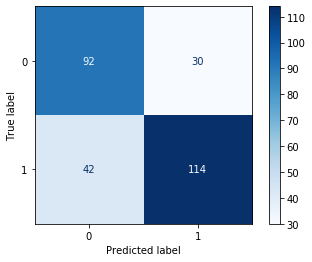

In [89]:
#Taking a look at the confusion matrix
from sklearn.metrics import plot_confusion_matrix #Importing library
plot_confusion_matrix(gs_lr_cvec_model, X_test, y_test, cmap='Blues', values_format='d');

<i> Based on the confusion matrix, the model seems to perform a better job of predicting the Prime Video posts (accurately predicting 92/122 posts). Next, we evaluate top 20 features for both classes to gain further insights.

In [90]:
#Extracting features with highest probabilities
coefs = pd.DataFrame(gs_lr_cvec_model.steps[1][1].coef_[0])
coefs.columns = ['coefs']
coefs['feature'] = gs_lr_cvec_model.steps[0][1].get_feature_names() #Extracting feature names
coefs = coefs.sort_values(by='coefs', ascending=False).reset_index(drop=True)
coefs

,coefs,feature
0,0.864205,would
1,0.829774,crown
2,0.828036,plan
3,0.812304,phone
4,0.751976,christmas
...,...,...
2995,-0.670194,borat
2996,-0.698610,unavailable
2997,-0.783079,purchase
2998,-0.956871,free


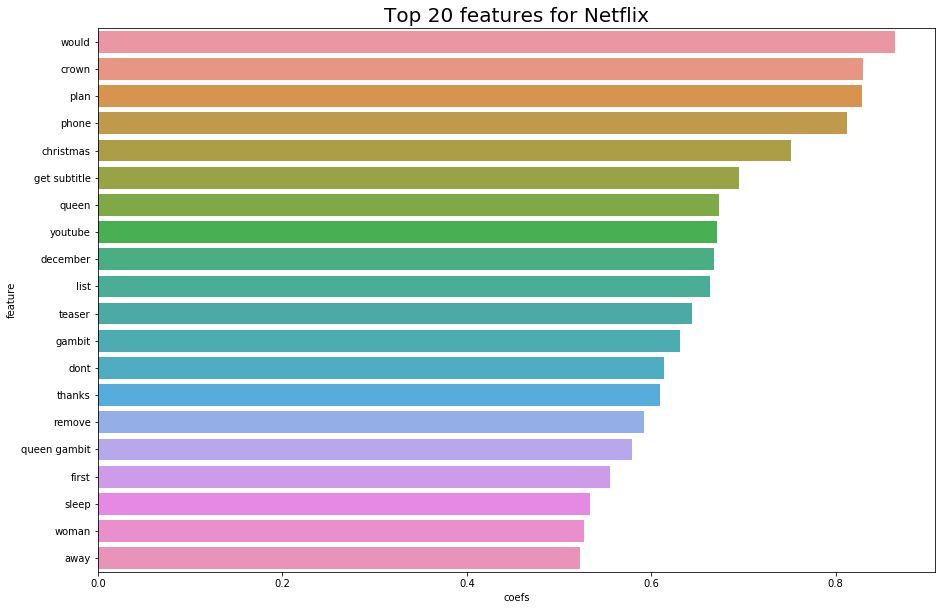

In [91]:
#Extracting and plotting top 20 features for Netflix
top_features_netflix = coefs.head(20)
plt.figure(figsize=(15,10));
sns.barplot(data=top_features_netflix, x = 'coefs', y = 'feature');
plt.title('Top 20 features for Netflix', fontsize=20);

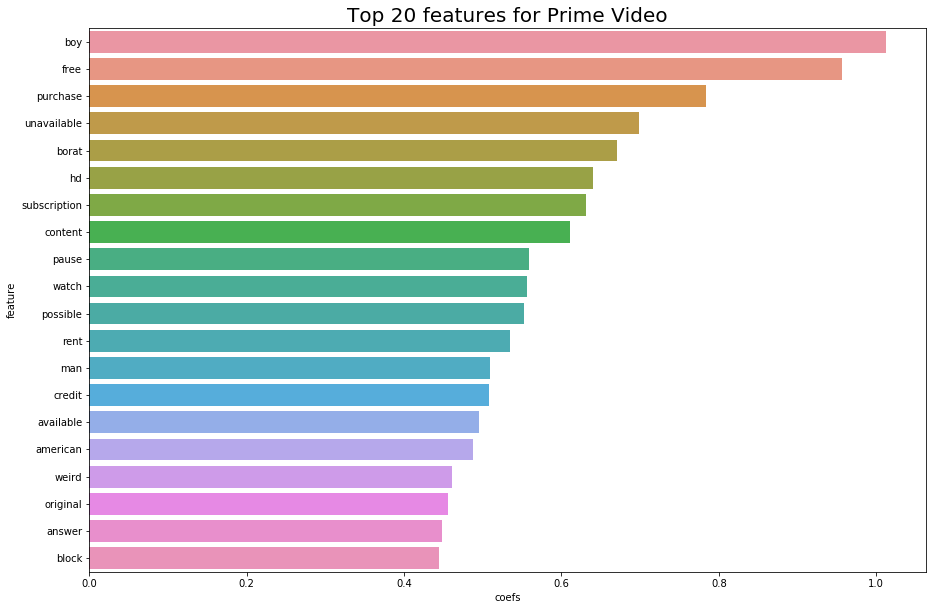

In [92]:
#Extracting top 20 features for Prime Video
top_features_prime = coefs.tail(20)
top_features_prime['coefs'] = top_features_prime['coefs'].abs()
top_features_prime = top_features_prime.sort_values(by='coefs', ascending=False).reset_index(drop=True)
plt.figure(figsize=(15,10));
sns.barplot(data=top_features_prime, x = 'coefs', y = 'feature');
plt.title('Top 20 features for Prime Video', fontsize=20);

<i> While some bigrams appear in the top features, most of the top features are individual words for both Netflix and Prime Video. We also notice that some of the top predictors, more so for Prime Video, are generic words such as subscription, content and watch. This could result in misclassification of Netflix posts containing these generic words.  
    
We take a look at some of the misclassified posts to see if this might be the case. To start with, we create a dataframe of the posts with their predicted and actual class.

In [93]:
#Creating dataframe of posts with predicted and actual class
post_classification = pd.DataFrame(gs_lr_cvec_model.predict(X_test))
post_classification.columns = ['prediction']
post_classification['actual'] = y_test.reset_index(drop=True)
post_classification['post'] = X_test.reset_index(drop=True)
post_classification

,prediction,actual,post
0,1,0,boy season boy seasseason theory hi guy friend...
1,1,1,get k go pc matter matter cant get go high p e...
2,1,0,video unavailable try watch season viking firs...
3,1,1,netflix cut scene multiple show multiple show ...
4,0,0,watch conversation amazon prime video
...,...,...,...
273,1,0,continue watch anyone issue continue watch fir...
274,1,1,anyone else notice list change sometimes many ...
275,0,0,control prime video alexa open prime video fir...
276,1,1,stranger thing witcher ozark among top enterta...


In [94]:
#Extracting misclassified posts
misclassified_posts = post_classification[post_classification['prediction'] != post_classification['actual']]
misclassified_posts.head()

,prediction,actual,post
0,1,0,boy season boy seasseason theory hi guy friend...
2,1,0,video unavailable try watch season viking firs...
7,0,1,anyone know possible watch pg version naruto n...
9,0,1,lack k content eu buy k tv also k netflix plan...
12,1,0,believe invincible adult animate series come a...


In [95]:
#Taking a look at misclassified Netflix posts
misclassified_netflix_posts = misclassified_posts[misclassified_posts['actual'] == 1]
misclassified_netflix_posts['post'].head(10)

7     anyone know possible watch pg version naruto n...
9     lack k content eu buy k tv also k netflix plan...
18    elliot page continue star umbrella academy net...
19    credit charge gift card charge credit gc month...
23                               netflix fix evangelion
24    clone high netflix keep see article stuff say ...
42    greys anatomy watch grey anatomy year netflix ...
48    one punch man english dub hover thumbnail audi...
59         opinion social dilemma documentary get wrong
60    unnatural selection anyone love science base d...
Name: post, dtype: object

In [96]:
misclassified_netflix_posts['post'][9]

'lack k content eu buy k tv also k netflix plan bit baffle k selection seem absolutely tiny netflix original uhd non original mostly full hd include many recent blockbuster k category show around movie although certainly everything display best way filter k content'

In [97]:
misclassified_netflix_posts['post'][42]

'greys anatomy watch grey anatomy year netflix suddenly disappear google unable find anything say remove app anyone else problem technical issue'

<i> As we suspected, we can see that some of the misclassified Netflix posts include generic words such as watch and content, which are also included in the top features for Prime Video.

In [98]:
#Taking a look at misclassified Prime Video posts
misclassified_prime_posts = misclassified_posts[misclassified_posts['actual'] == 0]
misclassified_prime_posts['post'].head(10)

0      boy season boy seasseason theory hi guy friend...
2      video unavailable try watch season viking firs...
12     believe invincible adult animate series come a...
17                     mirzapur season preview come next
21     use window app automatically skip trailer intr...
34     time boys release th september uk expect uploa...
51     detective anna season watch show like crack we...
65     por que la serie hern n es una mala representa...
75     deep really talent get friend kill try hardest...
103    ask library hi guy start use prime video find ...
Name: post, dtype: object

In [99]:
misclassified_prime_posts['post'][21]

'use window app automatically skip trailer intro recap use window app way automatically always skip trailer intro recap show three nuisance skip every new episode x b thanks'

In [100]:
misclassified_prime_posts['post'][103]

'ask library hi guy start use prime video find many movie series browser however check prime videos application phone see lot series film see browser guys customize change library setting see movie choose thanks'

<i> Similar to what we observed for the Netflix posts, we see that some of the misclassified Prime Video posts seem to include generic words such as thanks that are also part of the top features for Netflix.

## Conclusion

By deploying the Logistic Regression classifier model with CountVectorizer, InfluencerX can label a post as belonging to either the Netflix subreddit or Prime Video subreddit with 74.1% accuracy. 

One of the key limitations of the model at this point is the overfitting on the training dataset. To avoid this, we can look at training models with more data, when available. 

Based on the analysis of the misclassified posts above, we can also look at creating a list of generic words that can be used as stopwords to potentially improve accuracy.

To further improve accuracy, future projects can evaluate other models, should the project scope allow it, and even look at ensembling, which combines predictions from multiple separate models. 

As the model is not a 100% accurate at this point, there will likely still be a need for some human intervention before posting. However, the model can help streamline the content posting process and reduce man-hours spent on the process.